<a href="https://colab.research.google.com/github/joakimTI/JUMIA-PRODUCTS-RECOMMENDATION-AND-PRODUCT-REVIEW-SYSTEM/blob/Dorothy/Jumia_Product_Recommendation_and_Sentiment_Analysis_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd
data= pd.read_csv('/content/combined_dta.csv', encoding='ISO-8859-1')
data.head()

<ipython-input-117-c5d9f060eef6>:2: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('/content/combined_dta.csv', encoding='ISO-8859-1')


,web-scraper-order,web-scraper-start-url,product,product-href,product_name,image,price,brand,link,link-href,see_all,see_all-href,review_title,review,ratings,user_name,date,see_all_link,see_all_link-href,Category
0,1730407108-1,https://www.jumia.co.ke/computer-accessories/,Black Friday dealLaptop Skin Wrap Vinyl from 1...,https://www.jumia.co.ke/generic-laptop-skin-wr...,Laptop Skin Wrap Vinyl from 12-17.0 inches Lap...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,KSh 699 - KSh 797,NaN,NaN,https://www.jumia.co.ke/computer-accessories/?...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computing
1,1730407112-2,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,"KSh 3,325",NaN,NaN,https://www.jumia.co.ke/computer-accessories/?...,See All,https://www.jumia.co.ke/catalog/productratings...,OKAY,"Working, feels cheap",3 out of 5,by WILFRED,28/04/2022,NaN,NaN,Computing
2,1730407112-3,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,"KSh 3,325",NaN,NaN,https://www.jumia.co.ke/computer-accessories/?...,See All,https://www.jumia.co.ke/catalog/productratings...,okay,A bit big for a regular laptop bag... The fanc...,4 out of 5,by Michael,8/7/2021,NaN,NaN,Computing
3,1730407114-4,https://www.jumia.co.ke/computer-accessories/,"Black Friday dealLexar 2.5"" SATA 256GB Laptop ...",https://www.jumia.co.ke/lexar-2.5-sata-256gb-l...,"Lexar 2.5"" SATA 256GB Laptop SSD",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,"KSh 3,799",Lexar,NaN,https://www.jumia.co.ke/computer-accessories/?...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computing
4,1730407116-5,https://www.jumia.co.ke/computer-accessories/,"WD External Portable Hard Drive-2TBKSh 15,000",https://www.jumia.co.ke/wd-external-portable-h...,WD External Portable Hard Drive-2TB,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,"KSh 15,000",WD,NaN,https://www.jumia.co.ke/computer-accessories/?...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computing


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60464 entries, 0 to 60463
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      60464 non-null  object
 1   web-scraper-start-url  60464 non-null  object
 2   product                60464 non-null  object
 3   product-href           60464 non-null  object
 4   product_name           60459 non-null  object
 5   image                  60330 non-null  object
 6   price                  60330 non-null  object
 7   brand                  39584 non-null  object
 8   link                   28139 non-null  object
 9   link-href              36020 non-null  object
 10  see_all                40431 non-null  object
 11  see_all-href           40425 non-null  object
 12  review_title           37705 non-null  object
 13  review                 40201 non-null  object
 14  ratings                37618 non-null  object
 15  user_name          

In [119]:
data.shape

(60464, 20)

In [120]:
# missing values and percentages function
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
         # Create a DataFrame with the results
        missing_data = pd.DataFrame({'Null Values': mis_val, 'Percentage': mis_val_percent})

         # Filter out columns with no missing values and sort by 'Missing Values'
        missing_data = missing_data[missing_data['Null Values'] > 0].sort_values(by='Null Values', ascending=False)
        return missing_data

In [121]:
missing_values_table(df=data)

,Null Values,Percentage
see_all_link,60413,99.915652
see_all_link-href,60413,99.915652
link,32325,53.461564
link-href,24444,40.427362
ratings,22846,37.784467
user_name,22846,37.784467
date,22846,37.784467
review_title,22759,37.640580
brand,20880,34.532945
review,20263,33.512503


In [122]:
# replace columns with url
data.fillna({'link': 'No Link', 'link-href': 'No Link', 'see_all':'No Link','see_all_link-href':'No Link','see_all-href': 'no link', 'see_all_link':'No link'},  inplace=True)


In [123]:
# replace missing values with unknown
data.fillna ({'review': 'no review', 'brand': 'unknown', 'image': 'no image', 'product_name' : 'unknown', 'review_title': 'no title', 'username': 'Anonymous' }, inplace=True)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60464 entries, 0 to 60463
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      60464 non-null  object
 1   web-scraper-start-url  60464 non-null  object
 2   product                60464 non-null  object
 3   product-href           60464 non-null  object
 4   product_name           60464 non-null  object
 5   image                  60464 non-null  object
 6   price                  60330 non-null  object
 7   brand                  60464 non-null  object
 8   link                   60464 non-null  object
 9   link-href              60464 non-null  object
 10  see_all                60464 non-null  object
 11  see_all-href           60464 non-null  object
 12  review_title           60464 non-null  object
 13  review                 60464 non-null  object
 14  ratings                37618 non-null  object
 15  user_name          

Feature engineering

In [125]:
data.drop(['web-scraper-order'], axis=1, inplace=True)

In [126]:
# eploring columns
{col: data[col].unique()[:5] for col in data.columns}

{'web-scraper-start-url': array(['https://www.jumia.co.ke/computer-accessories/',
        'web-scraper-start-url',
        'https://www.jumia.co.ke/computer-components/',
        'https://www.jumia.co.ke/computer-data-storage/',
        'https://www.jumia.co.ke/laptops/'], dtype=object),
 'product': array(['Black Friday dealLaptop Skin Wrap Vinyl from 12-17.0 inches Laptops (Support All Brands)KSh 699 - KSh 797KSh 1,000 - KSh 1,20034%',
        'Black Friday deal9"-17" Laptop Cooling Stand PadKSh 3,325KSh 3,5005%4.1 out of 5(7)',
        'Black Friday dealLexar 2.5" SATA 256GB Laptop SSDKSh 3,799KSh 5,00024%',
        'WD External Portable Hard Drive-2TBKSh 15,000',
        'HP Color LaserJet Pro Multifunction M479fdwKSh 122,000KSh 200,00039%'],
       dtype=object),
 'product-href': array(['https://www.jumia.co.ke/generic-laptop-skin-wrap-vinyl-from-12-17.0-inches-laptops-support-all-brands-205863635.html',
        'https://www.jumia.co.ke/9-17-laptop-cooling-stand-pad-generic-mpg2748

In [127]:
data.tail()

,web-scraper-start-url,product,product-href,product_name,image,price,brand,link,link-href,see_all,see_all-href,review_title,review,ratings,user_name,date,see_all_link,see_all_link-href,Category
60459,https://www.jumia.co.ke/aromatherapy-fragrances/,Black Friday dealVitalEssence Aromas Eucalyptu...,https://www.jumia.co.ke/vitalessence-aromas-eu...,VitalEssence Aromas Eucalyptus Essential Oil ...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,KSh 675,VitalEssence Aromas,No Link,No Link,No Link,no link,no title,no review,NaN,NaN,NaN,No link,No Link,health and beauty
60460,https://www.jumia.co.ke/aromatherapy-fragrances/,Black Friday dealEssential Oil Diffuser Aromat...,https://www.jumia.co.ke/generic-essential-oil-...,Essential Oil Diffuser Aromatherapy Oil,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,KSh 499,unknown,No Link,No Link,See All,https://www.jumia.co.ke/catalog/productratings...,Humidifier,Small but does the work perfectly.,4 out of 5,by Christine,5/9/2023,No link,No Link,health and beauty
60461,https://www.jumia.co.ke/aromatherapy-fragrances/,Black Friday dealVitalEssence Aromas Tea Tree ...,https://www.jumia.co.ke/vitalessence-aromas-te...,VitalEssence Aromas Tea Tree Essential Oil - ...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,KSh 570 - KSh 751,VitalEssence Aromas,No Link,No Link,No Link,no link,no title,no review,NaN,NaN,NaN,No link,No Link,health and beauty
60462,https://www.jumia.co.ke/aromatherapy-fragrances/,Black Friday dealSADOER 3 pieces Multipurpose ...,https://www.jumia.co.ke/sadoer-3-pieces-multip...,SADOER 3 pieces Multipurpose Essential oils Ch...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,KSh 383,SADOER,No Link,No Link,See All,https://www.jumia.co.ke/catalog/productratings...,Kinder like it,The smell is good but doesn't actually last on...,3 out of 5,by Ahlam,23-10-2024,No link,No Link,health and beauty
60463,https://www.jumia.co.ke/aromatherapy-fragrances/,Black Friday dealSADOER 3 pieces Multipurpose ...,https://www.jumia.co.ke/sadoer-3-pieces-multip...,SADOER 3 pieces Multipurpose Essential oils Ch...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,KSh 383,SADOER,No Link,No Link,See All,https://www.jumia.co.ke/catalog/productratings...,quality,"As expected, very good",5 out of 5,by ritah,17-09-2024,No link,No Link,health and beauty


In [128]:
# Function to remove the currency and calculate the average of the price range
import re

def convert_price(price):
    # Remove non-numeric characters (i.e.currency symbols)
    cleaned_price = re.sub(r"[^\d.-]", "", str(price))

    # Handle ranges
    if '-' in cleaned_price:
        try:
            low, high = map(float, cleaned_price.split('-'))
            return (low + high) / 2
        except ValueError:
            return None  # Return None if conversion fails
    else:
        try:
            return float(cleaned_price)  # Convert single prices to float
        except ValueError:
            return None

In [129]:
# Apply the conversion function to the price column
data['price'] = data['price'].apply(convert_price)

In [130]:
# Extract values function
def extract_rating(rating):
    match = re.search(r'\d+', str(rating))  # Finding the first digit in the string
    if match:
        return float(match.group())  # Convert the first digit to float
    return None  # Return None if no digit is found

In [131]:
# Apply the function to the ratings column
data['ratings'] = data['ratings'].apply(extract_rating)

In [132]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y', errors='coerce')
# Extract year, month, and day into separate columns
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] =data['date'].dt.day

In [133]:
# Extract name following 'by' and ignore cases where 'by' isn't present
data['username'] = data['user_name'].str.extract(r'by\s+(.*)', expand=False)

In [134]:
data['sub_category'] = data['web-scraper-start-url'].str.extract(r'\/([^\/]+)\/?$')
data['sub_category']

,sub_category
0,computer-accessories
1,computer-accessories
2,computer-accessories
3,computer-accessories
4,computer-accessories
...,...
60459,aromatherapy-fragrances
60460,aromatherapy-fragrances
60461,aromatherapy-fragrances
60462,aromatherapy-fragrances


In [135]:
data['year'].unique()

array([  nan, 2023., 2024., 2022., 2020., 2021., 2019., 2018., 2017.])

In [136]:
data['ratings'].unique()

array([nan,  3.,  4.,  1.,  5.,  2.])

In [137]:
# Imputing columns with central tendancies
data['ratings'].fillna(data['ratings'].median(), inplace=True)
data['price'].fillna(data['price'].mean(), inplace=True)
data['year'].fillna(data['year'].mode()[0], inplace=True)
data['month'].fillna(data['month'].mode()[0], inplace=True)
data['day'].fillna(data['day'].mode()[0], inplace=True)

<ipython-input-137-157e4f79909a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ratings'].fillna(data['ratings'].median(), inplace=True)
<ipython-input-137-157e4f79909a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [138]:
data = data.drop(columns =['date','user_name'], axis=1)

In [139]:
data['price'].value_counts()

,count
price,
999.0,548
799.0,443
899.0,358
499.0,355
699.0,342
...,...
11083.0,1
9914.0,1
41014.0,1


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60464 entries, 0 to 60463
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-start-url  60464 non-null  object 
 1   product                60464 non-null  object 
 2   product-href           60464 non-null  object 
 3   product_name           60464 non-null  object 
 4   image                  60464 non-null  object 
 5   price                  60464 non-null  float64
 6   brand                  60464 non-null  object 
 7   link                   60464 non-null  object 
 8   link-href              60464 non-null  object 
 9   see_all                60464 non-null  object 
 10  see_all-href           60464 non-null  object 
 11  review_title           60464 non-null  object 
 12  review                 60464 non-null  object 
 13  ratings                60464 non-null  float64
 14  see_all_link           60464 non-null  object 
 15  se

In [141]:
data['sub_category'].value_counts()

,count
sub_category,
#catalog-listing,3657
mobile-phones,1448
mobile-accessories,1023
?price=0-1000,879
computer-accessories,875
...,...
outdoor-patio-furniture-accessories,49
motorcycle-powersports,46
sports-nutrition-testosterone-boosters,30


In [163]:
data['sub_category'] = data['sub_category'].replace(['#catalog-listing','?tag=REFU','?price=0-1000','?price=0-9999','nan'], 'uknown')
data['sub_category']= data['sub_category']. replace('freezers', 'appliances-fridges-freezers')

In [164]:
# download cleaned data
from google.colab import files
data.to_csv('cleaned_data2.csv', index=False)
# files.download('cleaned_data2.csv')



Visualization


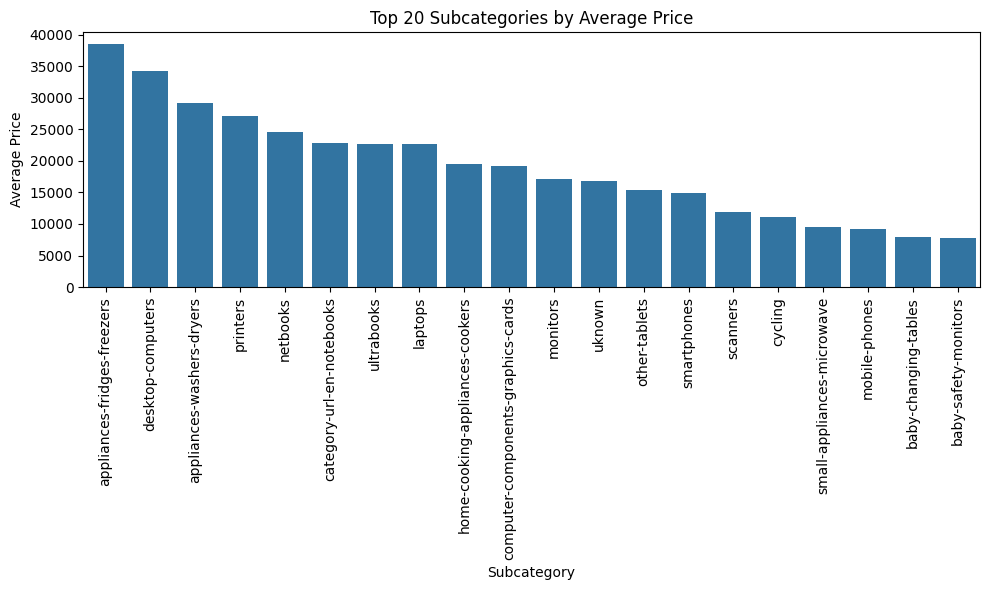

In [165]:
# distribution subplots
import matplotlib.pyplot as plt
import seaborn as sns
cleaned_data =pd.read_csv('/content/cleaned_data2.csv')

# Calculate the average price for each subcategory
avg_prices = cleaned_data.groupby('sub_category')['price'].mean()

cleaned_data['avg_price_per_subcategory'] = cleaned_data['sub_category'].map(avg_prices)

# Sort by average price and select the top 20 subcategories
top_20 = cleaned_data[['sub_category', 'avg_price_per_subcategory']].drop_duplicates()
top_20 = top_20.sort_values(by='avg_price_per_subcategory', ascending=False).head(20)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='sub_category', y='avg_price_per_subcategory', data=top_20)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.xlabel('Subcategory')
plt.ylabel('Average Price')
plt.title('Top 20 Subcategories by Average Price')
plt.tight_layout()
plt.show()




The figure above shows the product subcategory against price. Its clear to see that appliances, fridges and freezers have highest prices.

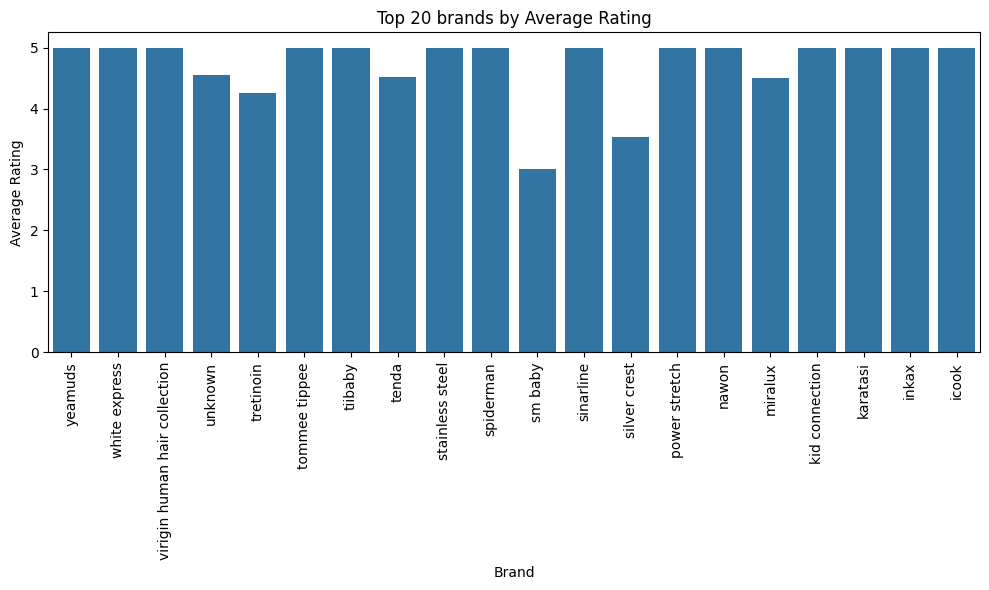

In [171]:

# Calculate the average rating for each brand
avg_rating = cleaned_data.groupby('brand')['ratings'].mean()

cleaned_data['average_rating_per_brand'] = cleaned_data['brand'].map(avg_rating)

# Sort by average rating and select the top 20 brands

brand_top_20 = cleaned_data[['brand', 'average_rating_per_brand']].drop_duplicates()

brand_top_20 = brand_top_20.sort_values(by='brand', ascending=False).head(20)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y= 'average_rating_per_brand', data=brand_top_20)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.title('Top 20 brands by Average Rating')
plt.tight_layout()
plt.show()


one hot encoding

In [145]:
cleaned_data =pd.read_csv('/content/cleaned_data2.csv')

In [146]:
{col: cleaned_data[col].unique()[:5] for col in cleaned_data.columns}

{'web-scraper-start-url': array(['https://www.jumia.co.ke/computer-accessories/',
        'web-scraper-start-url',
        'https://www.jumia.co.ke/computer-components/',
        'https://www.jumia.co.ke/computer-data-storage/',
        'https://www.jumia.co.ke/laptops/'], dtype=object),
 'product': array(['Black Friday dealLaptop Skin Wrap Vinyl from 12-17.0 inches Laptops (Support All Brands)KSh 699 - KSh 797KSh 1,000 - KSh 1,20034%',
        'Black Friday deal9"-17" Laptop Cooling Stand PadKSh 3,325KSh 3,5005%4.1 out of 5(7)',
        'Black Friday dealLexar 2.5" SATA 256GB Laptop SSDKSh 3,799KSh 5,00024%',
        'WD External Portable Hard Drive-2TBKSh 15,000',
        'HP Color LaserJet Pro Multifunction M479fdwKSh 122,000KSh 200,00039%'],
       dtype=object),
 'product-href': array(['https://www.jumia.co.ke/generic-laptop-skin-wrap-vinyl-from-12-17.0-inches-laptops-support-all-brands-205863635.html',
        'https://www.jumia.co.ke/9-17-laptop-cooling-stand-pad-generic-mpg2748

In [147]:
cleaned_data['link'] = cleaned_data['link'].replace(['2', '3', 'link'], 'No Link', regex=True)
cleaned_data['username'] = cleaned_data['username'].replace(['your name'], 'Anonymous', regex=True)
cleaned_data.drop(['link-href','see_all_link-href'], axis=1, inplace=True)

In [148]:
cleaned_data.drop(['see_all'], axis=1, inplace=True)
cleaned_data.drop(['see_all_link'], axis=1, inplace=True)

In [149]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60464 entries, 0 to 60463
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-start-url  60464 non-null  object 
 1   product                60464 non-null  object 
 2   product-href           60464 non-null  object 
 3   product_name           60464 non-null  object 
 4   image                  60464 non-null  object 
 5   price                  60464 non-null  float64
 6   brand                  60464 non-null  object 
 7   link                   60464 non-null  object 
 8   see_all-href           60464 non-null  object 
 9   review_title           60464 non-null  object 
 10  review                 60464 non-null  object 
 11  ratings                60464 non-null  float64
 12  Category               60464 non-null  object 
 13  year                   60464 non-null  float64
 14  month                  60464 non-null  float64
 15  da

In [150]:
cleaned_data['username'].unique()

array([nan, 'WILFRED', 'Michael', ..., 'Antonina', 'Ahlam', 'ritah'],
      dtype=object)

In [151]:
{col: cleaned_data[col].unique()[:5] for col in cleaned_data.columns}

{'web-scraper-start-url': array(['https://www.jumia.co.ke/computer-accessories/',
        'web-scraper-start-url',
        'https://www.jumia.co.ke/computer-components/',
        'https://www.jumia.co.ke/computer-data-storage/',
        'https://www.jumia.co.ke/laptops/'], dtype=object),
 'product': array(['Black Friday dealLaptop Skin Wrap Vinyl from 12-17.0 inches Laptops (Support All Brands)KSh 699 - KSh 797KSh 1,000 - KSh 1,20034%',
        'Black Friday deal9"-17" Laptop Cooling Stand PadKSh 3,325KSh 3,5005%4.1 out of 5(7)',
        'Black Friday dealLexar 2.5" SATA 256GB Laptop SSDKSh 3,799KSh 5,00024%',
        'WD External Portable Hard Drive-2TBKSh 15,000',
        'HP Color LaserJet Pro Multifunction M479fdwKSh 122,000KSh 200,00039%'],
       dtype=object),
 'product-href': array(['https://www.jumia.co.ke/generic-laptop-skin-wrap-vinyl-from-12-17.0-inches-laptops-support-all-brands-205863635.html',
        'https://www.jumia.co.ke/9-17-laptop-cooling-stand-pad-generic-mpg2748

In [152]:
# Imputing columns with central tendancies
cleaned_data['ratings'].fillna(cleaned_data['ratings'].median(), inplace=True)
cleaned_data['price'].fillna(cleaned_data['price'].mean(), inplace=True)
cleaned_data['year'].fillna(cleaned_data['year'].mode()[0], inplace=True)
cleaned_data['month'].fillna(cleaned_data['month'].mode()[0], inplace=True)
cleaned_data['day'].fillna(cleaned_data['day'].mode()[0], inplace=True)

<ipython-input-152-e9e2357315a9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['ratings'].fillna(cleaned_data['ratings'].median(), inplace=True)
<ipython-input-152-e9e2357315a9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

label encoding

In [153]:
# label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cleaned_data['brand'] = label_encoder.fit_transform(cleaned_data['brand'])
cleaned_data['review_title'] = label_encoder.fit_transform(cleaned_data['review_title'])
cleaned_data['ratings'] = label_encoder.fit_transform(cleaned_data['ratings'])
cleaned_data['review'] = label_encoder.fit_transform(cleaned_data['review'])
cleaned_data['sub_category'] = label_encoder.fit_transform(cleaned_data['sub_category'])


In [154]:
cleaned_data['price'] = pd.to_numeric(cleaned_data['price'])

In [155]:
cleaned_data.describe()

,price,brand,review_title,review,ratings,year,month,day,sub_category
count,6.046400e+04,60464.000000,60464.000000,60464.000000,60464.000000,60464.000000,60464.000000,60464.000000,60464.000000
mean,5.250471e+03,1093.299864,7785.320058,16751.159434,3.413883,2023.909136,9.681348,21.968891,103.265943
std,1.761468e+04,554.070411,3666.630829,8283.496198,1.164316,0.455825,1.362935,1.745508,54.169078
min,3.000000e+01,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,13.000000,0.000000
25%,7.270000e+02,491.000000,3947.000000,9624.750000,3.000000,2024.000000,10.000000,22.000000,60.000000
50%,1.390000e+03,1192.000000,10063.000000,18857.500000,4.000000,2024.000000,10.000000,22.000000,106.000000
75%,3.912000e+03,1689.000000,10645.000000,24799.000000,4.000000,2024.000000,10.000000,22.000000,148.000000
max,1.370668e+06,1692.000000,13112.000000,25620.000000,4.000000,2024.000000,12.000000,31.000000,195.000000


In [156]:
# categorise the price column
cleaned_data['price_category'] = pd.qcut (cleaned_data['price'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


In [157]:
cleaned_data.drop(['price'], axis=1, inplace=True)

In [158]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60464 entries, 0 to 60463
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   web-scraper-start-url  60464 non-null  object  
 1   product                60464 non-null  object  
 2   product-href           60464 non-null  object  
 3   product_name           60464 non-null  object  
 4   image                  60464 non-null  object  
 5   brand                  60464 non-null  int64   
 6   link                   60464 non-null  object  
 7   see_all-href           60464 non-null  object  
 8   review_title           60464 non-null  int64   
 9   review                 60464 non-null  int64   
 10  ratings                60464 non-null  int64   
 11  Category               60464 non-null  object  
 12  year                   60464 non-null  float64 
 13  month                  60464 non-null  float64 
 14  day                    60464 non-null 

In [159]:
cleaned_data['username'].unique()
cleaned_data['username'].fillna('Anonymous', inplace=True)

<ipython-input-159-bcf6bebc0b9a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['username'].fillna('Anonymous', inplace=True)


In [160]:
data.to_csv('transformed_data.csv', index=False)

Data transformation

In [161]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
transformed_data= pd.read_csv('/content/transformed_data.csv')

# Download necessary datasets from NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# df = pd.DataFrame(transformed_data)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [162]:
# Initialize lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatization
    return text

# Apply cleaning function
transformed_data['product'] = transformed_data['product'].apply(clean_text)
transformed_data['username'] = transformed_data['username'].apply(clean_text)
transformed_data.to_csv('transformed_data1.csv', index=False)


AttributeError: 'float' object has no attribute 'lower'

In [ ]:
transformed_data.info()